In [1]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/IndependentStudy/BookProject')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/IndependentStudy/BookProject'

# Content of the Project

1. Set Up
2. Web-scraping
3. Exploratory Data Analysis

## Read data

In [2]:
import pandas as pd

metadata_df = pd.read_csv('data/metadata_with_genres.csv', index_col = 0)
metadata_df.head(3)

,item_id,url,title,authors,lang,img,year,description,first_genre,second_genre
0,16827462,https://www.goodreads.com/book/show/11870085-t...,The Fault in Our Stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",Young Adult,Romance
1,2792775,https://www.goodreads.com/book/show/2767052-th...,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,eng,https://images.gr-assets.com/books/1447303603m...,2008,Winning will make you famous.\nLosing means ce...,Young Adult,Fiction
2,8812783,https://www.goodreads.com/book/show/7260188-mo...,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,eng,https://images.gr-assets.com/books/1358275419m...,2010,My name is Katniss Everdeen.\nWhy am I not dea...,Young Adult,Science Fiction


In [3]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9374 entries, 0 to 9373
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item_id       9374 non-null   int64 
 1   url           9374 non-null   object
 2   title         9374 non-null   object
 3   authors       9374 non-null   object
 4   lang          8818 non-null   object
 5   img           9374 non-null   object
 6   year          9374 non-null   int64 
 7   description   9309 non-null   object
 8   first_genre   9373 non-null   object
 9   second_genre  9373 non-null   object
dtypes: int64(2), object(8)
memory usage: 805.6+ KB


In [4]:
ratings_df = pd.read_csv('data/ratings.csv', index_col = 0)
ratings_df.head(3)

,item_id,user_id,rating
0,41335427,0,5
1,41335427,1,3
2,41335427,2,5


In [5]:
ratings_df.shape

(5152656, 3)

In [6]:
tags_df = pd.read_csv('data/tagdl.csv')
tags_df.head(3)

,tag,item_id,score
0,samurai,16416771,0.000240
1,samurai,23756807,0.000189
2,samurai,24248331,0.000008


In [7]:
tags_df.shape

(6814898, 3)

Book metadata: 9374 data points with 10 features including 
item_id, url, title, authors, lang, img, release year, description, primary and secondary genres

Ratings data: 5,152,656 data points with 350,332 users
	Each data point represents each user’s rating for a specific book

Tag genomes data: 6,814,898 data points
	Each data point represents each tag score for a specific book


## Preliminary Exploration

Limitations of the genre feature: Genres are voted by users so it could change through time. The data only reflected how users voted till November 5th 2022

Metadata:
- What are the different genres and the distribution?
- When were the books released?
- What are the languages of the book?

Ratings:
- How many users?
- On average how many users rate a particular movie?

Tags:
- How many tags?


- Removing missing values, outliers, and unnecessary rows/ columns.
- Re-indexing and reformatting our data.
- Univariate analysis
- Bivariate analysis


### Metadata

#### Genre

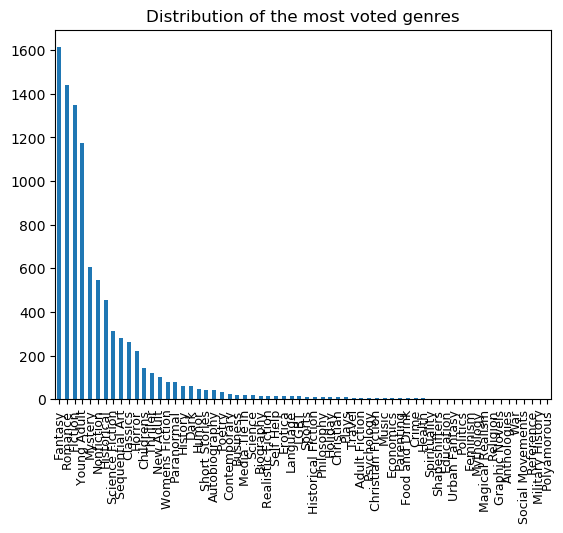

In [15]:
from matplotlib import pyplot as plt
metadata_df['first_genre'].value_counts().plot(kind = 'bar')
plt.title('Distribution of the most voted genres')
plt.xticks(fontsize = 9)
plt.show()


In [16]:
metadata_df['first_genre'].value_counts()[0:50]

Fantasy               1613
Romance               1438
Fiction               1347
Young Adult           1174
Mystery                604
Nonfiction             546
Historical             455
Science Fiction        314
Sequential Art         279
Classics               261
Horror                 219
Childrens              145
Thriller               122
New Adult              102
Womens Fiction          80
Paranormal              80
History                 59
Dark                    59
Humor                   45
Short Stories           43
Autobiography           42
Poetry                  32
Contemporary            23
Business                21
Media Tie In            18
Science                 18
Biography               16
Realistic Fiction       15
Self Help               14
Erotica                 14
Language                13
LGBT                    13
Sports                  11
Historical Fiction      11
Philosophy              10
Holiday                 10
Christian                9
P

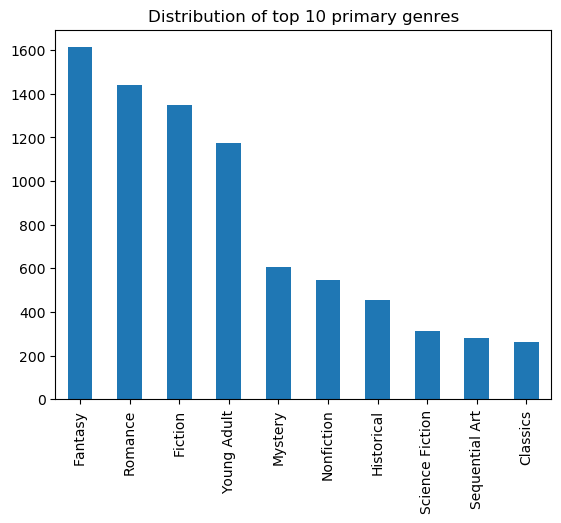

In [17]:
metadata_df['first_genre'].value_counts()[0:10].plot(kind = 'bar')
plt.title('Distribution of top 10 primary genres')
plt.show()

There are 64 genres. Some genres has only 1 data point.
- Fantasy, Romance, Fiction, Young Adult have 5572/9374 data points => multiclass classification task on 4 genres?
- Since the genres are user-voted, it’s a mess.

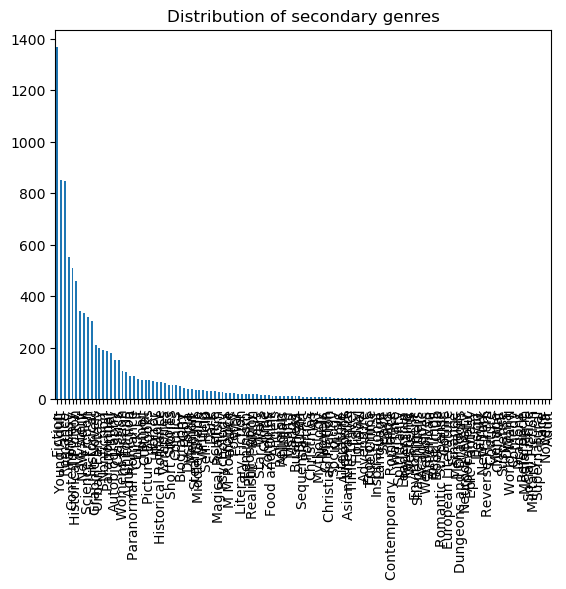

In [18]:
metadata_df['second_genre'].value_counts().plot(kind = 'bar')
plt.title('Distribution of secondary genres')
plt.show()


In [19]:
metadata_df['second_genre'].value_counts()[0:50]

Fiction               1366
Young Adult            852
Romance                849
Fantasy                553
Contemporary           510
Historical Fiction     459
Mystery                345
New Adult              334
Science Fiction        319
Historical             303
Graphic Novels         213
Urban Fantasy          199
Nonfiction             191
Paranormal             189
Thriller               180
Autobiography          153
Classics               152
Womens Fiction         109
Childrens              107
Adult Fiction           90
Paranormal Romance      90
Chick Lit               80
Humor                   77
Cultural                77
Picture Books           77
Horror                  71
History                 69
Historical Romance      68
Vampires                64
Sports                  55
Short Stories           54
Comics                  54
Biography               53
LGBT                    45
Dystopia                42
Memoir                  42
Steampunk               37
M

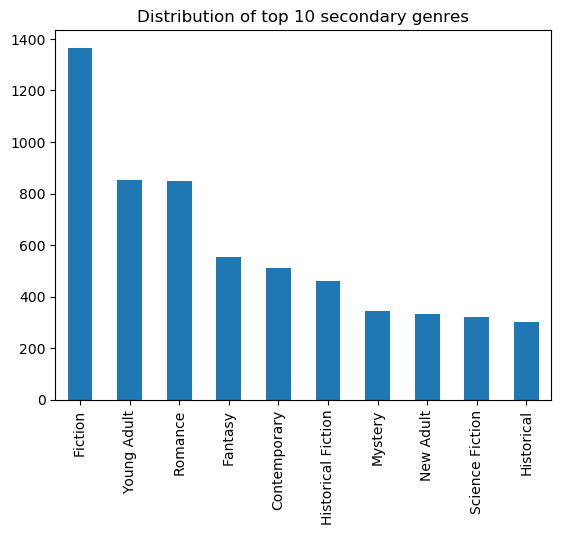

In [20]:
metadata_df['second_genre'].value_counts()[0:10].plot(kind = 'bar')
plt.title('Distribution of top 10 secondary genres')
plt.show()

#### Year

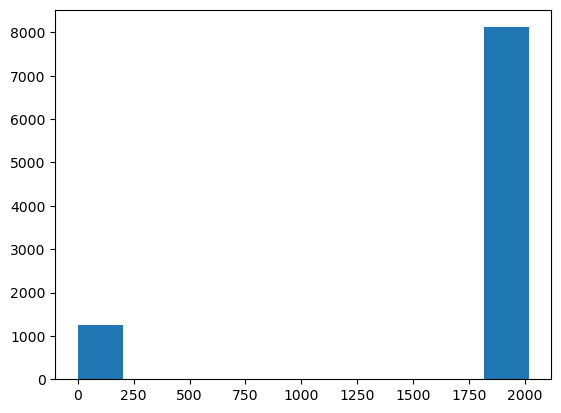

In [21]:
plt.hist(metadata_df['year'])
plt.show()

In [22]:
metadata_df[metadata_df['year'] == 0]

,item_id,url,title,authors,lang,img,year,description,first_genre,second_genre
5,878368,https://www.goodreads.com/book/show/19063.The_...,The Book Thief,Markus Zusak,eng,https://images.gr-assets.com/books/1390053681m...,0,"A story about, among other things: A girl, som...",Historical Fiction,Fiction
12,14345371,https://www.goodreads.com/book/show/9460487-mi...,Miss Peregrine’s Home for Peculiar Children (M...,Ransom Riggs,en-US,https://images.gr-assets.com/books/1472782916m...,0,A mysterious island. An abandoned orphanage. A...,Fantasy,Young Adult
22,4717423,https://www.goodreads.com/book/show/4667024-th...,The Help,Kathryn Stockett,eng,https://images.gr-assets.com/books/1346100365m...,0,Be prepared to meet three unforgettable women:...,Fiction,Historical
56,2588213,https://www.goodreads.com/book/show/1217100.Th...,Thirteen Reasons Why,Jay Asher,eng,https://images.gr-assets.com/books/1333822506m...,0,You can't stop the future.\nYou can't rewind t...,Young Adult,Contemporary
59,4422413,https://www.goodreads.com/book/show/4374400-if...,"If I Stay (If I Stay, #1)",Gayle Forman,en-US,https://images.gr-assets.com/books/1347462970m...,0,Librarian note: an alternate cover for this ed...,Young Adult,Romance
...,...,...,...,...,...,...,...,...,...,...
9319,5831056,https://www.goodreads.com/book/show/5659537-na...,"Naamah's Kiss (Naamah Trilogy, #1)",Jacqueline Carey,eng,https://s.gr-assets.com/assets/nophoto/book/11...,0,Once there were great magicians born to the Ma...,Fantasy,Romance
9339,12930527,https://www.goodreads.com/book/show/8134469-th...,The Good Daughters,Joyce Maynard,eng,https://images.gr-assets.com/books/1282860314m...,0,The bestselling author of Labor Day returns wi...,Fiction,Contemporary
9341,2393951,https://www.goodreads.com/book/show/234724.Sha...,"Shadow Puppets (Ender's Shadow, #3)",Orson Scott Card,NaN,https://s.gr-assets.com/assets/nophoto/book/11...,0,A Sequel to The New York TimesBestselling Ende...,Science Fiction,Fiction
9345,46681308,https://www.goodreads.com/book/show/26643691-s...,"Some Sort of Crazy (Happy Crazy Love, #2)",Melanie Harlow,en-CA,https://images.gr-assets.com/books/1446654825m...,0,When a psychic tells Natalie Nixon her life is...,Romance,Romance


There are 1256/9374 missing data (coded as 0) in the year column


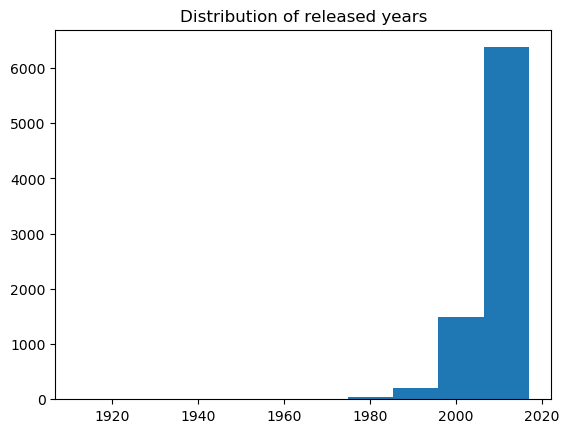

In [23]:
plt.hist(metadata_df[metadata_df['year'] != 0]['year'])
plt.title('Distribution of released years')
plt.show()

In [31]:
metadata_df[metadata_df['year'] != 0].agg({'year':["max","min"]})

,year
max,2017
min,1912


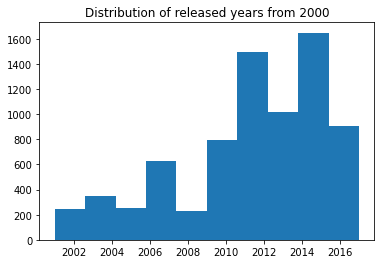

In [ ]:
plt.hist(metadata_df[metadata_df['year'] > 2000]['year'])
plt.title('Distribution of released years from 2000')
plt.show()

#### Language

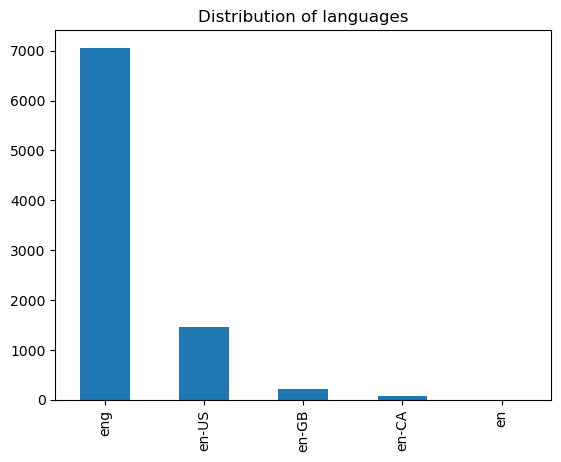

In [33]:
plt.figure()
metadata_df['lang'].value_counts().plot(kind = 'bar')
plt.title('Distribution of languages')
plt.show()

All languages are some types of English

### Ratings

In [ ]:
len(pd.unique(ratings_df['user_id']))

350332

In [ ]:
ratings_df.groupby('item_id')['user_id'].count().mean()

549.6752720290165

In [ ]:
ratings_df.groupby('item_id').count().sort_values(by = 'user_id', ascending = False)['user_id']

item_id
16827462    21442
2792775     19818
13306276    17536
13155899    16527
41107568    14543
            ...  
39961074      148
19076939      148
21856196      146
26163493      141
41549233      140
Name: user_id, Length: 9374, dtype: int64

In [ ]:
metadata_df[metadata_df['item_id'] == 16827462]

,item_id,url,title,authors,lang,img,year,description,first_genre,second_genre
0,16827462,https://www.goodreads.com/book/show/11870085-t...,The Fault in Our Stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",Young Adult,Romance


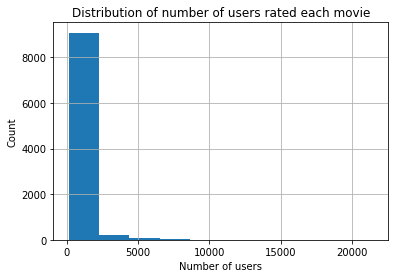

In [ ]:
ratings_df.groupby('item_id').count()['user_id'].hist()
plt.title('Distribution of number of users rated each movie')
plt.ylabel('Count')
plt.xlabel('Number of users')
plt.show()

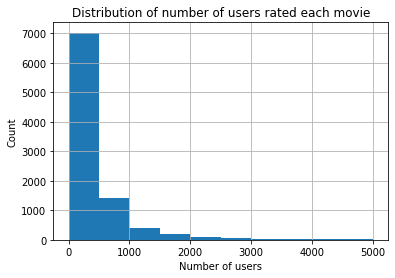

In [ ]:
ratings_df.groupby('item_id').count()['user_id'].hist(range = (0,5000))
plt.title('Distribution of number of users rated each movie')
plt.ylabel('Count')
plt.xlabel('Number of users')
plt.show()

Ratings data: 5,152,656 data points with 350,332 users
	Each data point represents each user’s rating for a specific book
Ratings are on the scale 1-5

Each movie is rated by 549 users on average. 
The most popular movie is rated by 21,442 users (“The Fault in Our Stars” by John Green)
The least popular movie is rated by 140 users

The histogram has a long-tail curve since there are a few popular books


In [ ]:
ratings_df['rating'].agg(['min','max','mean','median'])

min       1.000000
max       5.000000
mean      3.955796
median    4.000000
Name: rating, dtype: float64

In [ ]:
# 50th Percentile
def q25(x):
    return x.quantile(0.25)

# 90th Percentile
def q75(x):
    return x.quantile(0.75)

ratings_df_groupby = ratings_df.groupby('item_id').agg(['count','min','max',q25, q75, 'mean','median', pd.Series.mode])['rating']

In [ ]:
ratings_df_groupby.sort_values(by ='count', ascending = False).head(10)

,count,min,max,q25,q75,mean,median,mode
item_id,,,,,,,,
16827462,21442,1,5,4.0,5.0,4.401269,5.0,5
2792775,19818,1,5,4.0,5.0,4.414875,5.0,5
13306276,17536,1,5,3.0,5.0,3.847115,4.0,4
13155899,16527,1,5,4.0,5.0,4.153990,4.0,5
41107568,14543,1,5,3.0,4.0,3.656054,4.0,4
8812783,14450,1,5,3.0,5.0,3.898408,4.0,5
878368,12847,1,5,4.0,5.0,4.489453,5.0,5
6171458,12395,1,5,4.0,5.0,4.329810,5.0,5
48765776,12217,1,5,3.0,5.0,3.594745,4.0,4


In [ ]:
ratings_df_groupby.sort_values(by ='count', ascending = False).tail(10)

,count,min,max,q25,q75,mean,median,mode
item_id,,,,,,,,
46257672,153,1,5,4.0,5.0,4.098039,4.0,5
2968997,153,1,5,3.0,5.0,3.803922,4.0,5
3038235,153,1,5,4.0,5.0,3.993464,4.0,"[4, 5]"
2365504,152,1,5,3.0,4.0,3.638158,4.0,4
48183733,150,1,5,3.0,5.0,3.860000,4.0,4
39961074,148,2,5,4.0,5.0,4.445946,5.0,5
19076939,148,1,5,3.0,4.0,3.594595,4.0,4
21856196,146,1,5,2.0,4.0,2.746575,3.0,3
26163493,141,1,5,2.0,4.0,2.992908,3.0,3


In [ ]:
ratings_df.groupby('item_id').count().sort_values(by = 'user_id', ascending = False)['user_id']

item_id
16827462    21442
2792775     19818
13306276    17536
13155899    16527
41107568    14543
            ...  
39961074      148
19076939      148
21856196      146
26163493      141
41549233      140
Name: user_id, Length: 9374, dtype: int64

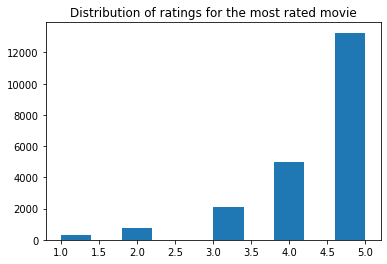

In [ ]:
plt.hist(ratings_df[ratings_df['item_id'] == 16827462]['rating'])
plt.title('Distribution of ratings for the most rated movie')
plt.show()

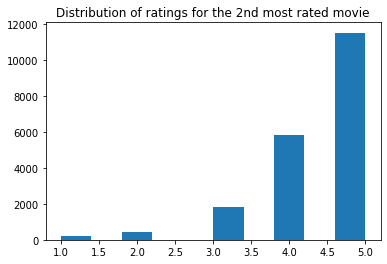

In [ ]:
plt.hist(ratings_df[ratings_df['item_id'] == 2792775]['rating'])
plt.title('Distribution of ratings for the 2nd most rated movie')
plt.show()

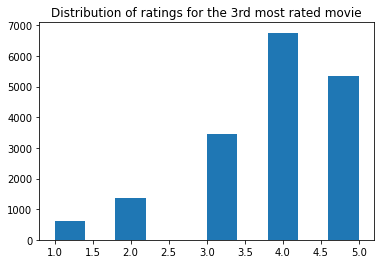

In [ ]:
plt.hist(ratings_df[ratings_df['item_id'] == 13306276]['rating'])
plt.title('Distribution of ratings for the 3rd most rated movie')
plt.show()

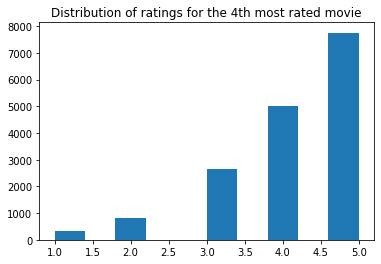

In [ ]:
plt.hist(ratings_df[ratings_df['item_id'] == 13155899]['rating'])
plt.title('Distribution of ratings for the 4th most rated movie')
plt.show()

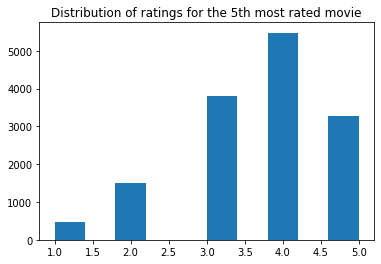

In [ ]:
plt.hist(ratings_df[ratings_df['item_id'] == 41107568]['rating'])
plt.title('Distribution of ratings for the 5th most rated movie')
plt.show()

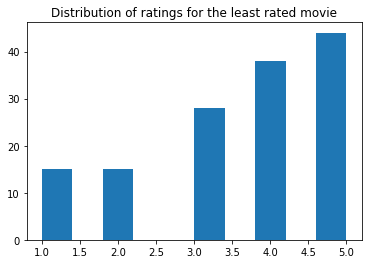

In [ ]:
plt.hist(ratings_df[ratings_df['item_id'] == 41549233]['rating'])
plt.title('Distribution of ratings for the least rated movie')
plt.show()

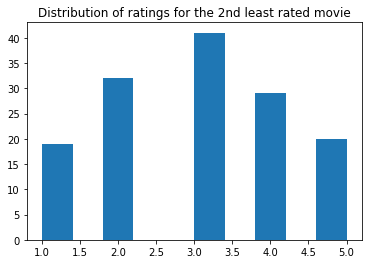

In [ ]:
plt.hist(ratings_df[ratings_df['item_id'] == 26163493]['rating'])
plt.title('Distribution of ratings for the 2nd least rated movie')
plt.show()

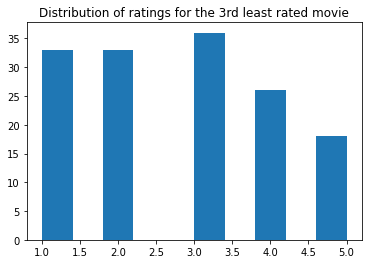

In [ ]:
plt.hist(ratings_df[ratings_df['item_id'] == 21856196]['rating'])
plt.title('Distribution of ratings for the 3rd least rated movie')
plt.show()

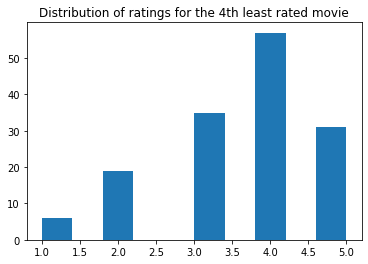

In [ ]:
plt.hist(ratings_df[ratings_df['item_id'] == 19076939]['rating'])
plt.title('Distribution of ratings for the 4th least rated movie')
plt.show()

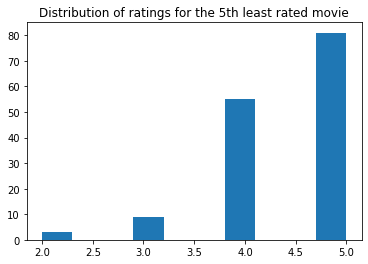

In [ ]:
plt.hist(ratings_df[ratings_df['item_id'] == 39961074]['rating'])
plt.title('Distribution of ratings for the 5th least rated movie')
plt.show()

### Tags

In [34]:
len(pd.unique(tags_df['tag']))

727

In [35]:
tags_df.groupby('tag').count()['item_id'].max()

9374

In [ ]:
tags_df['score'].agg([''])

Tag genomes data: 6,814,898 data points. Each data point represents each tag score for a specific book

727 tags, no missing tags for movies
